<a href="https://colab.research.google.com/github/Tianea2160/PythonPractice/blob/master/sklearnPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

iris = load_iris()

iris_data = iris.data
# print("iris data type : ", type(iris.data))
# print("iris data : ", iris.data)

iris_label = iris.target
print('iris target value : ', iris_label)
print('iris target name : ', iris.target_names)

iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)


iris target value :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target name :  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
# test, train case split

x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
result = dt_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, result)

SyntaxError: ignored

In [ ]:
# 학습데이터로 test까지 해보기
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
iris_data = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris_data.data
train_label = iris_data.target

dt_clf.fit(train_data, train_label)
pred = dt_clf.predict(train_data)
print(accuracy_score(pred, train_label))


1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state = 121)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
print(accuracy_score(pred, y_test))

0.9555555555555556


In [ ]:
# kfold 방식을 사용하여 학습
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
features = iris_data.data
label = iris_data.target
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits = 5)
arr_accuracy = []
print("붓꽃 데이터 세트 크기 : ", features.shape[0])

n_iter = 0
for train_index, test_index in kfold.split(features):
  x_train, x_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  dt_clf.fit(x_train, y_train)
  pred = dt_clf.predict(x_test)
  n_iter+=1
  accuracy = np.round(accuracy_score(pred, y_test),4)
  train_size = x_train.shape[0]
  test_size = x_test.shape[0]

  print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
  # print("#{0}검증 세트 인덱스:{1}".format(n_iter, test_index)))
  print(test_index)
  arr_accuracy.append(accuracy)
print("평균 검증 정확도:", np.mean(arr_accuracy))

붓꽃 데이터 세트 크기 :  150

#1 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정확도: 0.9


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

iris_df['label'] = iris.target
print(iris_df['label'].value_counts())

# kfold를 사용하면 데이터 세트 분할 과정에서 고르지 못한 세트 분할이 일어날 수 있다(중요)

2    50
1    50
0    50
Name: label, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
import pandas as pd

# 좋지 않은 예시
kfold = KFold(n_splits=3)
n_iter = 0;
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target


for train_index, test_index in kfold.split(iris_df):
  n_iter+=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print("## 교차 검증:{0}".format(n_iter))
  print('train 레이블 데이터 분포 : ')
  print(label_train.value_counts())
  print('test 레이블 데이터 분포 : ')
  print(label_test.value_counts(), end="\n\n")

## 교차 검증:1
train 레이블 데이터 분포 : 
2    50
1    50
Name: label, dtype: int64
test 레이블 데이터 분포 : 
0    50
Name: label, dtype: int64

## 교차 검증:2
train 레이블 데이터 분포 : 
2    50
0    50
Name: label, dtype: int64
test 레이블 데이터 분포 : 
1    50
Name: label, dtype: int64

## 교차 검증:3
train 레이블 데이터 분포 : 
1    50
0    50
Name: label, dtype: int64
test 레이블 데이터 분포 : 
2    50
Name: label, dtype: int64



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

skf = StratifiedKFold(n_splits=3)
n_iter = 0;
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
dt_clf = DecisionTreeClassifier()

features = iris.data
label = iris.target
accuracy_list = []

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter+=1
  x_train, x_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  dt_clf.fit(x_train, y_train)
  pred = dt_clf.predict(x_test)

  accuracy_list.append(accuracy_score(y_test, pred))


print(accuracy_list)
print(np.mean(accuracy_list))

[0.98, 0.94, 0.98]
0.9666666666666667


In [ ]:
# kfold를 편하게 사용할 수 있도록 해주는 api : cross_val_score()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris.data
label = iris.target

scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 : ', np.round(scores,4))
print('교차 검증별 정확도 : ', np.round(np.mean(scores),4))


교차 검증별 정확도 :  [0.98 0.94 0.98]
교차 검증별 정확도 :  0.9667


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=121, test_size=0.2)


dt_clf = DecisionTreeClassifier()

parameters = {"max_depth" : [1,2,3], "min_samples_split":[2,3]}

In [ ]:
import pandas as pd

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)

grid_dtree.fit(x_train, y_train)

scores_df = pd.DataFrame(data=grid_dtree.cv_results_)
scores_df[["params", "mean_test_score", "rank_test_score", "split0_test_score", "split1_test_score", "split2_test_score"]]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [ ]:
# data preprocessing
# label incoding
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoder = LabelEncoder()
items = ['TV', "냉장고", "전자레인지","컴퓨터", "선풍기", "선풍기","믹서", "믹서"]

encoder.fit(items)
labels = encoder.transform(items)
print("encoder reuslt : ", labels)
test = [4,5,1,0,1,1,3,3]

print(type(labels))
test = encoder.inverse_transform(test)


print("inverse transform : ", test )

# one-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()
items = ['TV', "냉장고", "전자레인지","컴퓨터", "선풍기", "선풍기","믹서", "믹서"]

encoder.fit(items)
labels = encoder.transform(items)
labels = labels.reshape(-1,1)

print(labels)

encoder = OneHotEncoder()
encoder.fit(labels)
result = encoder.transform(labels)
print(result.toarray())
print(result.shape)

encoder reuslt :  [0 1 4 5 3 3 2 2]
<class 'numpy.ndarray'>
inverse transform :  ['전자레인지' '컴퓨터' '냉장고' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']
[[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris.data, columns= iris.feature_names)

print(iris_df.mean())
print(iris_df.var())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data = iris_scaled, columns=iris.feature_names)
print(iris_df_scaled.mean())
print(iris_df_scaled.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [ ]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_minmax_scaled = scaler.transform(iris_df)
minmax_df = pd.DataFrame(data = iris_minmax_scaled, columns = iris.feature_names)
print(minmax_df.mean())
print(minmax_df.var())
print(minmax_df.min())
print(minmax_df.max())

sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

scaler = MinMaxScaler()

scaler.fit(train_array)
result = scaler.transform(train_array)

print(result.reshape(-1))
print(train_array.reshape(-1))

scaler.fit(test_array)
result = scaler.transform(test_array)


print(result.reshape(-1))
print(test_array.reshape(-1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 0  1  2  3  4  5  6  7  8  9 10]
[0.  0.2 0.4 0.6 0.8 1. ]
[0 1 2 3 4 5]


In [ ]:
titanic_df = pd.read_csv("./sample_data/train.csv")
print(titanic_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna("N", inplace=True)
titanic_df['Embarked'].fillna("N", inplace=True)
print(titanic_df.isnull().sum().sum())
print(titanic_df.isnull())
print(titanic_df.isnull().sum(), type(titanic_df.isnull()))


0
     PassengerId  Survived  Pclass   Name  ...  Ticket   Fare  Cabin  Embarked
0          False     False   False  False  ...   False  False  False     False
1          False     False   False  False  ...   False  False  False     False
2          False     False   False  False  ...   False  False  False     False
3          False     False   False  False  ...   False  False  False     False
4          False     False   False  False  ...   False  False  False     False
..           ...       ...     ...    ...  ...     ...    ...    ...       ...
886        False     False   False  False  ...   False  False  False     False
887        False     False   False  False  ...   False  False  False     False
888        False     False   False  False  ...   False  False  False     False
889        False     False   False  False  ...   False  False  False     False
890        False     False   False  False  ...   False  False  False     False

[891 rows x 12 columns]
PassengerId    0
Survived

In [ ]:
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
G6               4
B96 B98          4
C23 C25 C27      4
C22 C26          3
              ... 
C101             1
D46              1
D6               1
E40              1
C46              1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


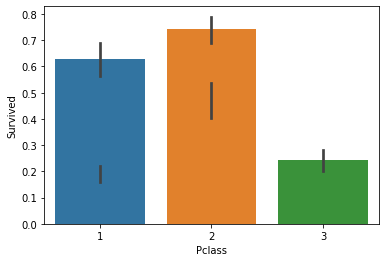

In [ ]:
import seaborn as sns
# 성별과 지위에 따른 생존자 수치 분석
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()
sns.barplot(x = "Sex", y = 'Survived', data=titanic_df)

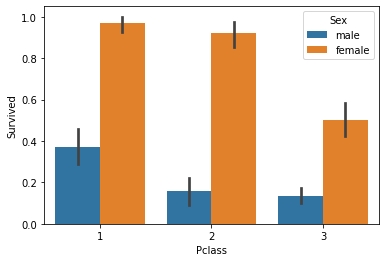

In [ ]:
sns.barplot(x = "Pclass", y = "Survived", hue="Sex", data=titanic_df)


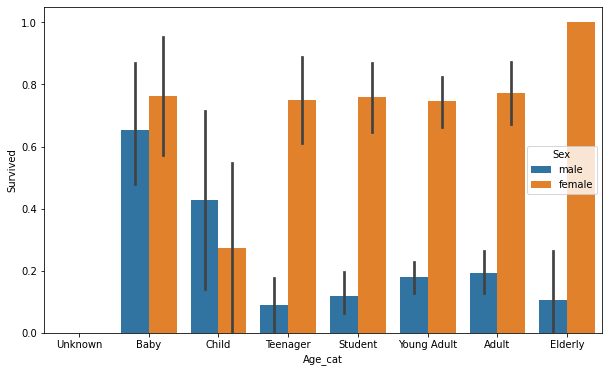

In [ ]:
def get_category(age):
  cat = ""
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else: cat = 'Elderly'
  return cat



import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
group_names = ["Unknown", "Baby", "Child","Teenager","Student","Young Adult","Adult", "Elderly"]
titanic_df["Age_cat"] = titanic_df["Age"].apply(lambda x : get_category(x))
sns.barplot(x = "Age_cat", y="Survived", hue = "Sex",order=group_names, data=titanic_df)
titanic_df.drop("Age_cat", inplace = True, axis= 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDf):
  features = ['Cabin', 'Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDf[feature])
    dataDf[feature] = le.transform(dataDf[feature])
    
  return dataDf


titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#전처리 함수 구현
def fillna(df):
  df['Age'].fillna(df["Age"].mean(), inplace = True)
  df['Cabin'].fillna("N", inplace = True)
  df['Embarked'].fillna("N", inplace = True)
  return df
def drop_featrues(df):
  df.drop(["PassengerId", "Name","Ticket"],axis=1, inplace = True )
  return df
def format_features(df):
  df["Cabin"] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

def transform(df):
  df = fillna(df)
  df = drop_featrues(df)
  df = format_features(df)
  return df

titanic_df = pd.read_csv("./sample_data/train.csv")
y_titanic_df = titanic_df["Survived"]
x_titanic_df = titanic_df.drop("Survived", axis=1)
x_titanic_df  = transform(x_titanic_df)
print(x_titanic_df)

     Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked
0         3    1  22.000000      1      0   7.2500      7         3
1         1    0  38.000000      1      0  71.2833      2         0
2         3    0  26.000000      0      0   7.9250      7         3
3         1    0  35.000000      1      0  53.1000      2         3
4         3    1  35.000000      0      0   8.0500      7         3
..      ...  ...        ...    ...    ...      ...    ...       ...
886       2    1  27.000000      0      0  13.0000      7         3
887       1    0  19.000000      0      0  30.0000      1         3
888       3    0  29.699118      1      2  23.4500      7         3
889       1    1  26.000000      0      0  30.0000      2         0
890       3    1  32.000000      0      0   7.7500      7         2

[891 rows x 8 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(random_state = 11, solver='lbfgs', max_iter=100 )

dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
print(np.round(accuracy_score(pred, y_test),4))

rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(np.round(accuracy_score(pred, y_test),4))


lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
print(np.round(accuracy_score(pred, y_test),4))

0.7877
0.8547
0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.model_selection import KFold

def exec_kflod(clf, folds = 5):
  kfold = KFold(n_splits = folds)
  scores = []
  for iter_count, (train_index, test_inde)


SyntaxError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print("오차 행렬")
  print(confusion)
  print("정확도 : {0:.4f},정밀도 : {1:.4f},재현율 : {2:.4f}".format(accuracy, precision, recall))

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv("./sample_data/train.csv")
y_titanic_df = titanic_df["Survived"]
x_titanic_df = titanic_df.drop("Survived", axis=1)
x_titanic_df  = transform(x_titanic_df)

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)
lr_clf = LogisticRegression(solver='lbfgs', max_iter=5000)
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492,정밀도 : 0.7742,재현율 : 0.7869


In [ ]:
pred = lr_clf.predict(x_test)
pred_proda = lr_clf.predict_proba(x_test)
# 왜인지 오류가 발생, logisticRegression에는 predict_proda가 있어야하는데 없는 요소라고 에러가 떠서 상당히 골치를 썩히고 있음
print("shape : ", pred_proda.shape)
print(pred_proda[:3])

pred_proda_result = np.concatenate([pred_proda, pred.reshape(-1,1)], axis=1)
print("두개의 class중에서 더 큰 확률을 클래스 값으로 예측\n", pred_proda_result[:3])

shape :  (179, 2)
[[0.46233127 0.53766873]
 [0.87873981 0.12126019]
 [0.87717595 0.12282405]]
두개의 class중에서 더 큰 확률을 클래스 값으로 예측
 [[0.46233127 0.53766873 1.        ]
 [0.87873981 0.12126019 0.        ]
 [0.87717595 0.12282405 0.        ]]


In [ ]:
from sklearn.preprocessing import Binarizer
X = [[1,-1,2],[2,0,0],[0,1.1,1.2]]
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
from sklearn.preprocessing import Binarizer
custom_threshold = 0.4

#print(pred_proda)
pred_proba_1 = pred_proda[:,1].reshape(-1,1)
#print(pred_proba_1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324,정밀도 : 0.7183,재현율 : 0.8361


In [ ]:
thresholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
    custom_predict = binarizer.transform(pred_proba_1)
    print("임계값 : ", custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proda[:,1].reshape(-1,1), thresholds)

임계값 :  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324,정밀도 : 0.7183,재현율 : 0.8361
임계값 :  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492,정밀도 : 0.7656,재현율 : 0.8033
임계값 :  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492,정밀도 : 0.7742,재현율 : 0.7869
임계값 :  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659,정밀도 : 0.8364,재현율 : 0.7541
임계값 :  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771,정밀도 : 0.8824,재현율 : 0.7377


In [ ]:
from sklearn.metrics import precision_recall_curve

# positive part split
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print("shape : ", thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
print(np.round(thresholds[thr_index], 2))

print("precision : ",np.round(precisions[thr_index], 3))
print("recall : ",np.round(recalls[thr_index], 3))

shape :  (143,)
[  0  15  30  45  60  75  90 105 120 135]
[0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
precision :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
recall :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


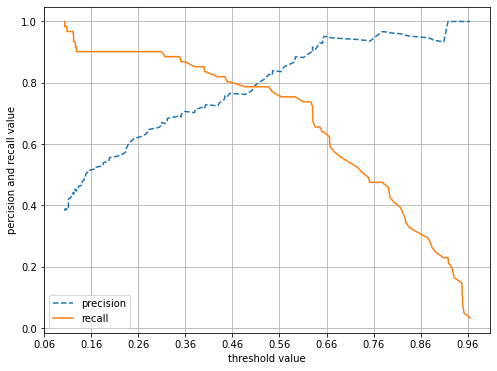

In [ ]:
import matplotlib.pyplot as plt

# 위 코드를 시각화 해보자
def precision_recall_curve_plot(y_test, pred_proba_c1):
  pricisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
  plt.figure(figsize = (8,6))
  threshold_bondary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_bondary], linestyle = "--", label="precision")
  plt.plot(thresholds, recalls[0:threshold_bondary], label="recall")

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlabel("threshold value")
  plt.ylabel("percision and recall value")
  plt.legend();plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

In [ ]:
# 정밀도와 재현율은 모두 중요하다 따라서 이 두가지를 모두 고려한 지표가 있는데 이를 f1 score라고 한다
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print("f1 score : ", f1)

f1 score :  0.7804878048780488


In [ ]:
# 임계값에 변화를 주면서 f1 score의 변화를 관찰
def get_clf_eval(y_test, pred):
  confusions = confusion_matrix(y_test, pred)
  precisions = precision_score(y_test, pred)

In [14]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)


lr_clf = LogisticRegression(max_iter = 5000)
lr_clf.fit(x_train, y_train)
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
#print(fprs, type(fprs), fprs.shape)

# 전체 index에서 5구간으로 분할
thr_index = np.arange(1, thresholds.shape[0], 5)
print(thr_index)
print(np.round(thresholds[thr_index],2))
print("FPR")
print(np.round(fprs[thr_index],3))
print("TPR")
print(np.round(tprs[thr_index],3))


[ 1  6 11 16 21 26 31 36 41 46 51]
[0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
FPR
[0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
TPR
[0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


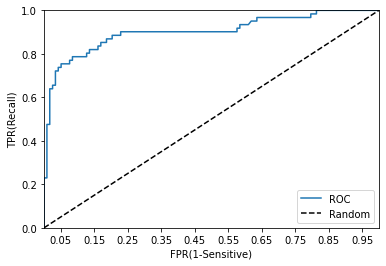

In [17]:
import matplotlib.pyplot as plt

# 시각화
def roc_curve_plot(y_test, pred_proba_c1):
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  plt.plot(fprs, tprs, label="ROC")
  plt.plot([0,1],[0,1],"k--", label="Random")
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel("FPR(1-Sensitive)");plt.ylabel("TPR(Recall)")
  plt.legend()

roc_curve_plot(y_test, pred_proba_class1)